# Análisis de Encuesta

Este notebook contiene el análisis de las respuestas obtenidas del formulario.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
sns.set_palette('viridis')

# Cargar los datos
file_path = 'Respuestas.xlsx'
sheet_name = 'Respuestas de formulario 1'
df = pd.read_excel(file_path, sheet_name=sheet_name)


## Sección 1
### Problema 1: Clasificación por género

Frecuencia por género:
Genero
Hombre    22
Mujer      8
Name: count, dtype: int64

Porcentajes por género:
Genero
Hombre    73.333333
Mujer     26.666667
Name: count, dtype: float64


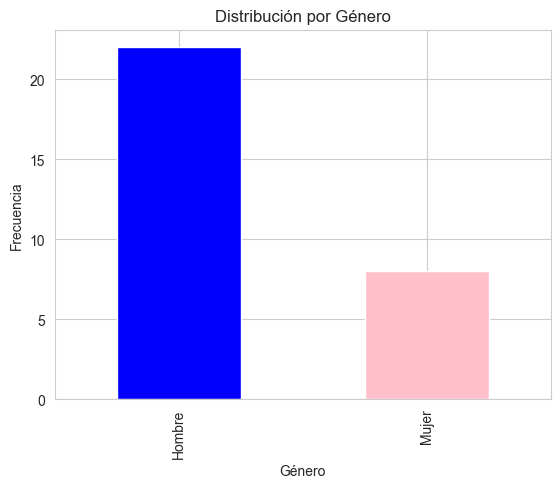

In [3]:

# Clasificar respuestas por género
genero_counts = df['Genero'].value_counts()
genero_porcentaje = (genero_counts / genero_counts.sum()) * 100

# Mostrar resultados
print("Frecuencia por género:")
print(genero_counts)
print("\nPorcentajes por género:")
print(genero_porcentaje)
# Crear histograma de género
genero_counts.plot(kind='bar', color=['blue', 'pink'])
plt.title('Distribución por Género')
plt.xlabel('Género')
plt.ylabel('Frecuencia')
plt.show()

**Interpretación de los resultados**: La muestra está compuesta mayoritariamente por hombres (73.33%) y en menor medida por mujeres (26.67%). Esto sugiere que los hombres participaron casi tres veces más que las mujeres en la encuesta. Es importante tener en cuenta esta distribución al analizar los resultados globales, ya que podría influir en las conclusiones finales. Si se busca representatividad equitativa, podría ser necesario realizar esfuerzos adicionales para aumentar la participación de las mujeres en encuestas futuras.

### Problema 2: Tabla de frecuencias agrupadas para edades

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo Excel
ruta_excel = 'Respuestas.xlsx'  # Cambia esta ruta si el archivo no está en el mismo directorio
datos = pd.read_excel(ruta_excel)

# Filtrar solo la columna de edad
edades = datos["Edad"]

# Crear intervalos de clase con una amplitud de 5 años
rango_min = edades.min()
rango_max = edades.max()
amplitud = 5

intervalos = pd.interval_range(
    start=rango_min - (rango_min % amplitud), 
    end=rango_max + amplitud, 
    freq=amplitud, 
    closed='left'
)

# Calcular frecuencias
frecuencias = pd.cut(edades, bins=intervalos).value_counts(sort=False)

# Obtener límites e información
limites_inferiores = [interval.left for interval in frecuencias.index.categories]
limites_superiores = [interval.right for interval in frecuencias.index.categories]
puntos_medios = [(li + ls) / 2 for li, ls in zip(limites_inferiores, limites_superiores)]
frecuencia_absoluta = frecuencias.values
frecuencia_relativa = frecuencia_absoluta / sum(frecuencia_absoluta)
porcentajes = frecuencia_relativa * 100

# Crear la tabla
tabla_frecuencias = pd.DataFrame({
    "LI (Límite Inferior)": limites_inferiores,
    "LS (Límite Superior)": limites_superiores,
    "xi (Punto Medio)": puntos_medios,
    "Frecuencia Absoluta": frecuencia_absoluta,
    "Frecuencia Relativa": frecuencia_relativa.round(2),
    "%": porcentajes.round(1)
})

# Agregar totales
fila_total = {
    "LI (Límite Inferior)": "Total",
    "LS (Límite Superior)": "",
    "xi (Punto Medio)": "",
    "Frecuencia Absoluta": sum(frecuencia_absoluta),
    "Frecuencia Relativa": sum(frecuencia_relativa).round(2),
    "%": porcentajes.sum().round(1)
}
tabla_frecuencias = pd.concat([tabla_frecuencias, pd.DataFrame([fila_total])], ignore_index=True)

# Mostrar la tabla con estilo Excel
tabla_frecuencias.style.set_table_styles([
    {'selector': 'thead th', 'props': [('background-color', '#4CAF50'), ('color', 'white'), ('font-weight', 'bold')]},
    {'selector': 'tbody tr', 'props': [('text-align', 'center')]}
]).set_caption("Tabla de Frecuencias")


,LI (Límite Inferior),LS (Límite Superior),xi (Punto Medio),Frecuencia Absoluta,Frecuencia Relativa,%
0,15,20,17.500000,5,0.170000,16.700000
1,20,25,22.500000,13,0.430000,43.300000
2,25,30,27.500000,7,0.230000,23.300000
3,30,35,32.500000,3,0.100000,10.000000
4,35,40,37.500000,1,0.030000,3.300000
5,40,45,42.500000,1,0.030000,3.300000
6,Total,,,30,1.000000,100.000000


**Interpretación de los resultados**: La distribución muestra una participación mayoritaria de personas entre 20 y 25 años, lo cual podría estar relacionado con el público objetivo de la encuesta o el canal por el cual se recolectaron los datos. Los extremos de la distribución (rangos de 15 a 20 años y 40 a 45 años) tienen una representación significativamente menor, lo cual puede indicar un alcance limitado en estas edades o una menor predisposición a participar.

Esta información puede ser utilizada para diseñar estrategias más inclusivas en futuras encuestas, garantizando una representación más uniforme en todos los rangos de edad.



## Sección 2
### Problema 1: Gráfico circular sobre aplicaciones de Blockchain

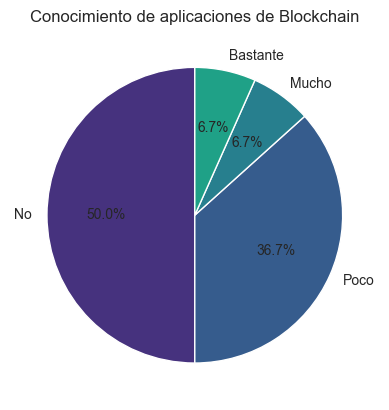

In [ ]:


# Gráfico circular para '¿Conoces las aplicaciones de Blockchain?'
respuestas = df['¿Conoces las aplicaciones de Blockchain en sistemas computacionales? '].value_counts()
respuestas.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title("Conocimiento de aplicaciones de Blockchain")
plt.ylabel("")
plt.show()


**Interpretación de los resultados**: Los resultados revelan que la mayoría de los participantes (86.7%) tienen poco o ningún conocimiento sobre aplicaciones de Blockchain. Esto indica que el Blockchain es un tema poco conocido entre los encuestados y que existe una gran oportunidad para la educación y difusión en esta área. Solo el 13.4% de los participantes afirmaron tener un conocimiento considerable o avanzado, lo que puede sugerir que este tema aún está en una etapa inicial de adopción dentro del grupo encuestado.

Este análisis es valioso para identificar lagunas de conocimiento y diseñar estrategias de capacitación enfocadas en aumentar el entendimiento y las habilidades en Blockchain entre los participantes.

### Problema 2: Media, mediana y moda de las edades

Media: 24.37
Mediana: 22.0
Moda: 20


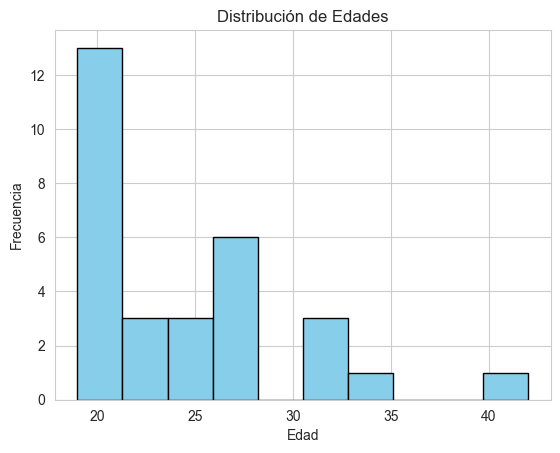

In [4]:

# Calcular medidas de tendencia central
media_edad = df['Edad'].mean()
mediana_edad = df['Edad'].median()
moda_edad = df['Edad'].mode()[0]

# Mostrar resultados
print(f"Media: {media_edad:.2f}")
print(f"Mediana: {mediana_edad}")
print(f"Moda: {moda_edad}")
# Crear histograma de edades
df['Edad'].plot(kind='hist', bins=10, color='skyblue', edgecolor='black')
plt.title('Distribución de Edades')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

**Interpretación de los resultados**: Los resultados sugieren que la distribución de edades está ligeramente sesgada hacia los grupos más jóvenes, con una moda de 20 años y una mediana cercana (22 años). La media, ligeramente mayor (24.37 años), sugiere que hay algunas edades más altas que están elevando el promedio. Estos datos indican que el grupo de participantes está compuesto mayoritariamente por jóvenes adultos, lo que puede influir en las tendencias observadas en las respuestas de otros análisis.


## Sección 3
### Problema 1: Desviación estándar de las edades

In [ ]:
# Calcular desviación estándar
desviacion_edad = df['Edad'].std().round(3)
print(f"Desviación estándar: {desviacion_edad}")


Desviación estándar: 5.72


**Interpretación de los resultados**: La desviación estándar de 5.72 sugiere que las edades de los participantes están algo dispersas en torno a la media (24.37 años). Aunque hay cierta variabilidad, los valores no están extremadamente alejados del promedio, lo que indica una distribución relativamente homogénea en términos de edad.


### Problema 2: Rango de edades

In [ ]:

# Calcular rango
rango_edad = df['Edad'].max() - df['Edad'].min()
print(f"Rango de edades: {rango_edad}")


Rango de edades: 23


**Interpretación de los resultados**: El rango indica que la diferencia entre la edad más joven y la más vieja es de 23 años. Esto sugiere que el grupo de participantes es bastante diverso en términos de edad, aunque la mayoría de los participantes están concentrados en un rango más joven, como lo indican los análisis de mediana, moda y frecuencia.

## Sección 4
### Problema 1: Coeficiente de asimetría de las edades

In [ ]:
# Calcular asimetría
asimetria = df['Edad'].skew()
print(f"Asimetría: {asimetria:.2f}")


Asimetría: 1.31


**Interpretación de los resultados**: La distribución de las edades tiene una asimetría positiva moderada (1.31). Esto significa que la mayoría de los datos se concentran en el extremo inferior de las edades, pero existen valores más altos que extienden la cola derecha de la distribución.

### Problema 2: Coeficiente de curtosis de las edades

In [ ]:
# Calcular curtosis
curtosis = df['Edad'].kurtosis()
print(f"Curtosis: {curtosis:.2f}")


Curtosis: 1.65


**Interpretación de los resultados**: La curtosis de 1.65 indica que la distribución de las edades es más plana que una distribución normal (platicúrtica), lo que sugiere que los datos están dispersos y no muy concentrados cerca de la media.

### Problema 3: Varianza en respuestas de actualización tecnológica

In [ ]:
# Mapear valores de texto a valores numéricos
df['Actualizacion_Numerica'] = df['¿Qué tan actualizado(a) te consideras en las nuevas tecnologías de sistemas computacionales? '].map(actualizacion_mapping)

# Calcular varianza
varianza_actualizacion = df['Actualizacion_Numerica'].var()
print(f"Varianza: {varianza_actualizacion:.3f}")


Varianza: 0.190


**Interpretación de los resultados**: La varianza baja (0.190) indica que las respuestas sobre actualización tecnológica están bastante concentradas, lo que sugiere que los participantes tienen niveles similares de percepción sobre su grado de actualización. Esto podría indicar un nivel homogéneo de conocimientos tecnológicos dentro del grupo.